In [34]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 初めに

このノートブックでは、電子製品のレビューデータを取り扱っています。四つのフィールドを持つデータセット、「user_id」,「product_id」,「rating」,そして「timestamp」を使用して基本的な探索的データ分析（EDA）を行います。EDAは、データがどのような特性を持っているか理解するための重要なステップです。ここで目指すのはデータの洞察を得ることで、これによりデータサイエンスのプロジェクト全体が方向付けられます。

本ノートブックは以下のステップを経てデータ分析を進めます：
1. データの読み込み
2. 基本的な統計情報の取得
3. タイムスタンプの日時形式への変換
4. 評価の分布の可視化

In [19]:
from pathlib import Path
import pandas as pd

In [20]:
# データソースを定義
DATA_PATH = Path.cwd().parent / 'data'
RAW_DATA_PATH = DATA_PATH / 'raw'

In [21]:
# 列名を指定
column_names = ['user_id', 'product_id', 'rating', 'timestamp']

In [22]:
ratings = pd.read_csv(RAW_DATA_PATH / 'ratings_Electronics.csv', names=column_names)

In [25]:
# timestampをdatatime形式に変換
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

In [26]:
ratings.head()

,user_id,product_id,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,2013-04-13
1,A2CX7LUOHB2NDG,0321732944,5.0,2012-07-01
2,A2NWSAGRHCP8N5,0439886341,1.0,2013-04-29
3,A2WNBOD3WNDNKT,0439886341,3.0,2013-07-22
4,A1GI0U4ZRJA8WN,0439886341,1.0,2012-04-18


In [27]:
ratings.describe()

,rating,timestamp
count,7.824482e+06,7824482
mean,4.012337e+00,2012-05-28 04:09:57.272408576
min,1.000000e+00,1998-12-04 00:00:00
25%,3.000000e+00,2011-09-07 00:00:00
50%,5.000000e+00,2013-02-17 00:00:00
75%,5.000000e+00,2013-12-04 00:00:00
max,5.000000e+00,2014-07-23 00:00:00
std,1.380910e+00,NaN


In [28]:
ratings.user_id.unique()

array(['AKM1MP6P0OYPR', 'A2CX7LUOHB2NDG', 'A2NWSAGRHCP8N5', ...,
       'A180UGKKYCPDH0', 'A2IGIIABRZ5LAB', 'A10M2KEFPEQDHN'], dtype=object)

#  可視化

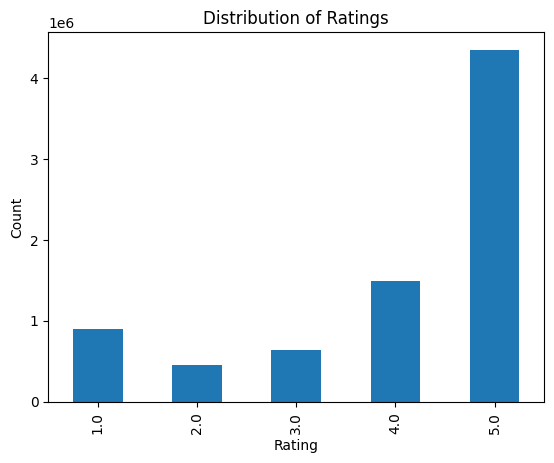

In [15]:
# レーティング分布の可視化
import matplotlib.pyplot as plt

ratings['rating'].value_counts().sort_index().plot(kind='bar')
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

In [47]:
# DeltaLake形式でのデータ出力
from deltalake.writer import write_deltalake

# Deltaテーブルのパスを定義
DELTA_TABLE_PATH = DATA_PATH / 'processed'

# Deltaテーブルを作成
write_deltalake(DELTA_TABLE_PATH, ratings, mode='overwrite')

/Users/toshi/dev/projects/personal/food-review-recommender/.venv/lib/python3.11/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):


# まとめ

このノートブックでは、Amazonの電子製品のレビューデータを用いた基本的なEDAを行いました。それぞれのスコアの評価回数を可視化し、データセット内の評価の分布を理解しました。また、UNIXエポックタイムスタンプを人間が読みやすい日時形式に変換しました。最後に、今後の分析で利用するDeltaLake形式での出力を行いました。

以上のEDAを通じて、データがどのような特性を持っているか、どのようなクレンジングや前処理が必要か、そして何が可能な分析なのか、について初歩的な理解が得られました。
